<a href="https://colab.research.google.com/github/slowdh/deep-learning-notebooks/blob/main/visualizing_hidden_layers_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# Get data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


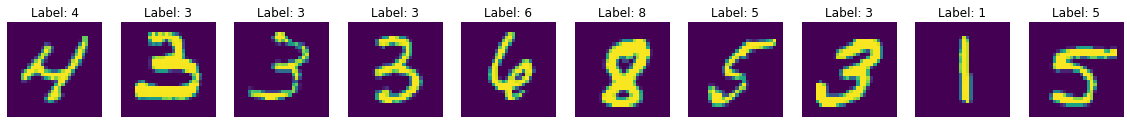

In [6]:
# Visualize data
random_arr = np.random.choice(60000, 10)
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i, j in enumerate(random_arr):
    ax[i].imshow(x_train[j, :, :, 0])
    ax[i].set_title(f"Label: {y_train[j].squeeze()}")
    ax[i].set_axis_off()

In [10]:
# Build model
x = x_input = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=7, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(x_input, x)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

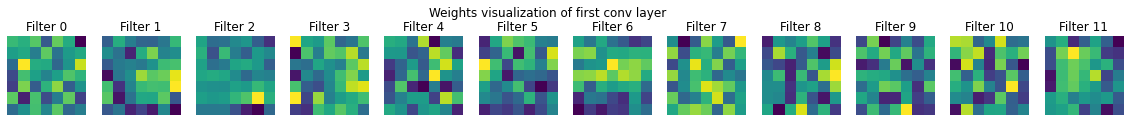

In [17]:
# Weights of conv layer 1 before training
a = model.layers[1].weights[0].numpy()
fig, ax = plt.subplots(1, 12, figsize=(20, 2))
fig.suptitle("Weights visualization of first conv layer")
for i in range(12):
    ax[i].imshow(a[:,:,0,i])
    ax[i].set_title(f'Filter {i}')
    ax[i].set_axis_off()

In [18]:
# Fit model
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0956 - accuracy: 0.9721 - val_loss: 0.0982 - val_accuracy: 0.9753
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1043 - accuracy: 0.9704 - val_loss: 0.1108 - val_accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1012 - accuracy: 0.9712 - val_loss: 0.1175 - val_accuracy: 0.9696
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.0936 - val_accuracy: 0.9740
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0940 - accuracy: 0.9729 - val_loss: 0.1178 - val_accuracy: 0.9676


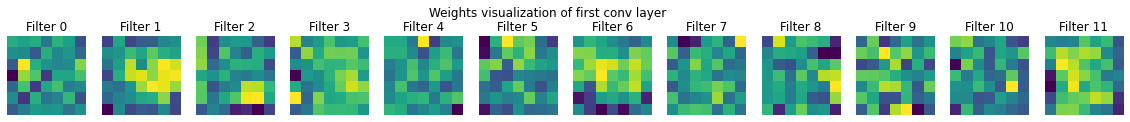

In [19]:
# Weights of conv layer 1 after training
b = model.layers[1].weights[0].numpy()
fig, ax = plt.subplots(1, 12, figsize=(20, 2))
fig.suptitle("Weights visualization of first conv layer")
for i in range(12):
    ax[i].imshow(b[:,:,0,i])
    ax[i].set_title(f'Filter {i}')
    ax[i].set_axis_off()

In [20]:
# Transfer weights to model
model.trainable = False
model_intermediate_values = Model(model.input, [layer.output for layer in model.layers])
test_image = x_test[:10]
test_label = y_test[:10]
outputs = model_intermediate_values(test_image)

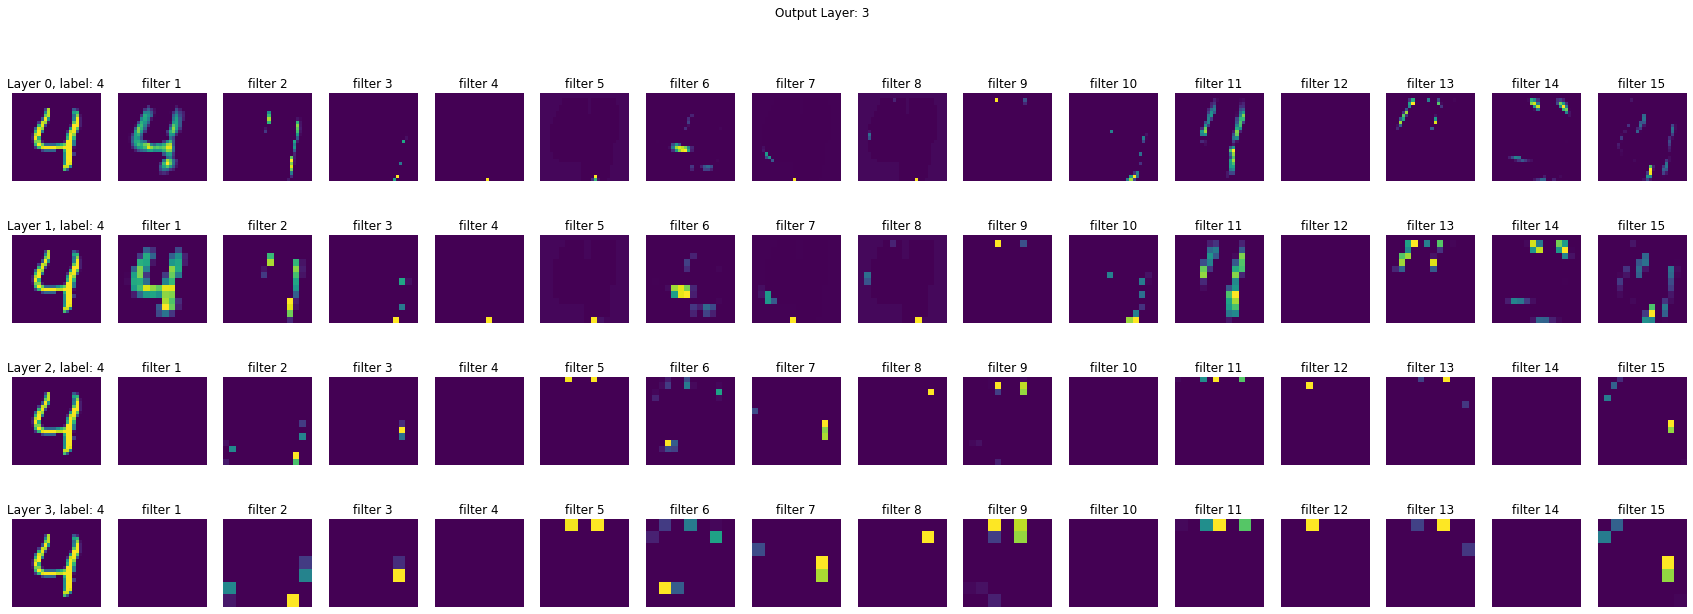

In [24]:
img = 4
fig, ax = plt.subplots(4, 16, figsize=(30, 10))
for layer_idx, output in enumerate(outputs[1:5]):
    fig.suptitle(f"Output Layer: {layer_idx}")
    for i in range(0, 16):
        if i == 0:
            ax[layer_idx][0].imshow(x_test[img, :, :, 0])
            ax[layer_idx][0].set_axis_off()
            ax[layer_idx][i].set_title(f'Layer {layer_idx}, label: {test_label[img]}')
        else:
            ax[layer_idx][i].imshow(output[img, :, :, i])
            ax[layer_idx][i].set_axis_off()
            ax[layer_idx][i].set_title(f'filter {i}')

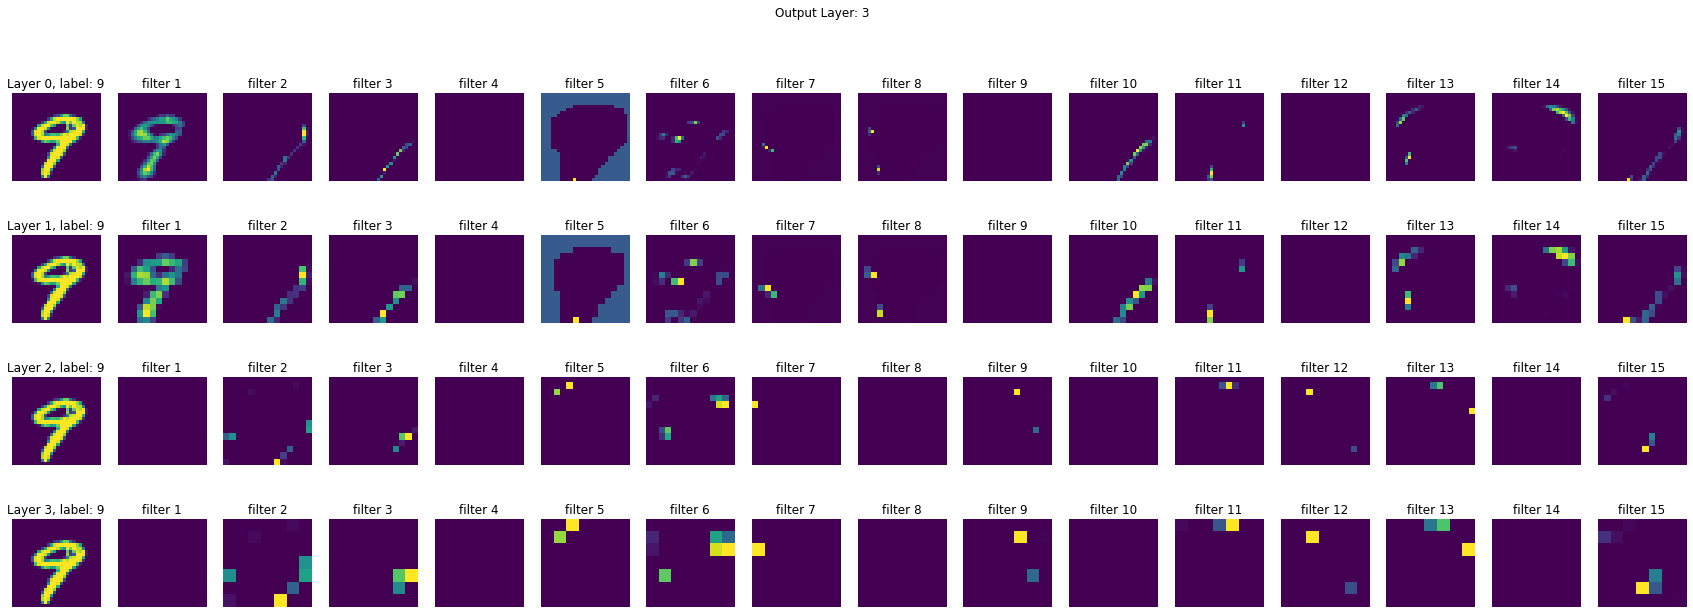

In [26]:
img = 9
fig, ax = plt.subplots(4, 16, figsize=(30, 10))
for layer_idx, output in enumerate(outputs[1:5]):
    fig.suptitle(f"Output Layer: {layer_idx}")
    for i in range(0, 16):
        if i == 0:
            ax[layer_idx][0].imshow(x_test[img, :, :, 0])
            ax[layer_idx][0].set_axis_off()
            ax[layer_idx][i].set_title(f'Layer {layer_idx}, label: {test_label[img]}')
        else:
            ax[layer_idx][i].imshow(output[img, :, :, i])
            ax[layer_idx][i].set_axis_off()
            ax[layer_idx][i].set_title(f'filter {i}')

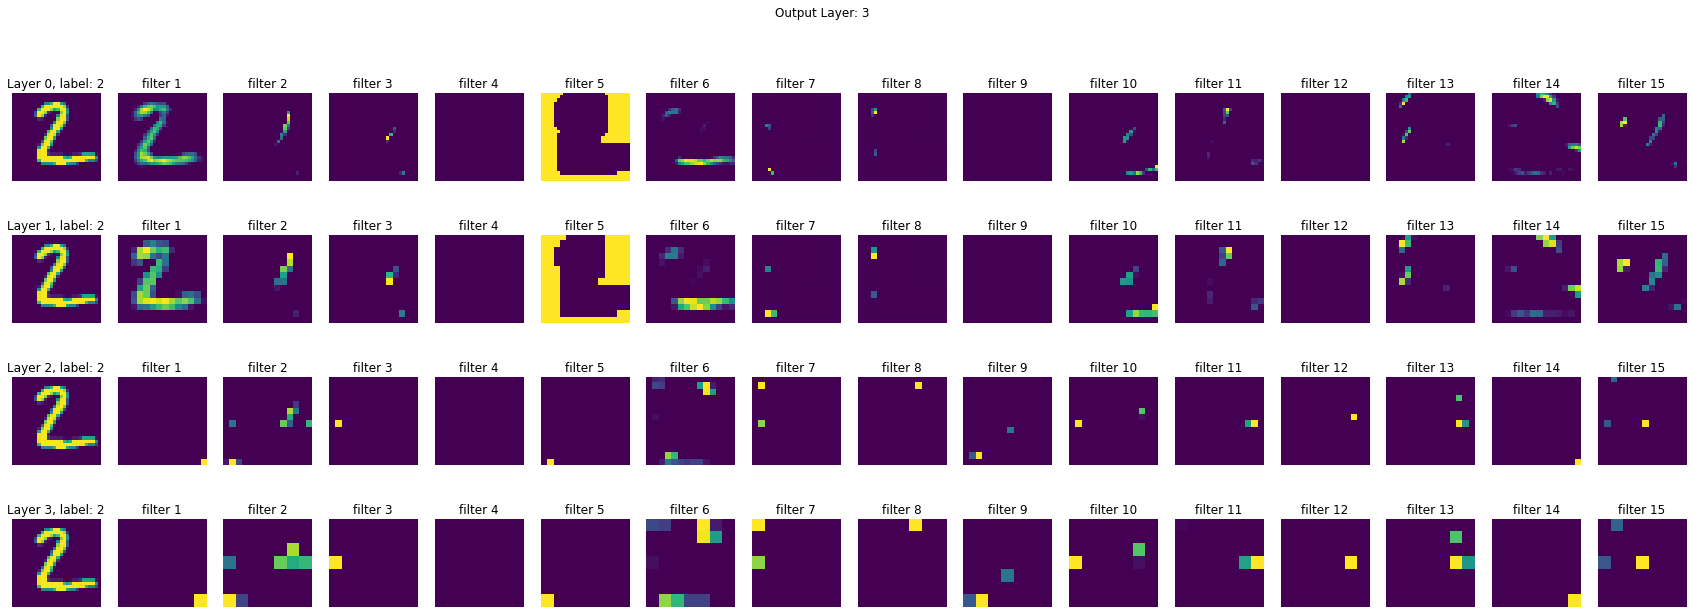

In [28]:
img = 1
fig, ax = plt.subplots(4, 16, figsize=(30, 10))
for layer_idx, output in enumerate(outputs[1:5]):
    fig.suptitle(f"Output Layer: {layer_idx}")
    for i in range(0, 16):
        if i == 0:
            ax[layer_idx][0].imshow(x_test[img, :, :, 0])
            ax[layer_idx][0].set_axis_off()
            ax[layer_idx][i].set_title(f'Layer {layer_idx}, label: {test_label[img]}')
        else:
            ax[layer_idx][i].imshow(output[img, :, :, i])
            ax[layer_idx][i].set_axis_off()
            ax[layer_idx][i].set_title(f'filter {i}')